In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Toy Datasets

### Dataset for Regression

In [9]:
N , n_feature = 8, 5

# target Weight & Bias
t_weights = torch.tensor([1,2,3,4,5], dtype = torch.float32) 
t_bias    = torch.tensor([10], dtype = torch.float32) 

x = torch.rand(N,n_feature)

y = torch.sum(t_weights * x, axis = 1) + t_bias # Broadcasting
print(t_weights.shape,'\n', t_weights)
print()
print(x.shape,'\n',x)        
print()
print(t_bias.shape,'\n',t_bias)        
print()
print(y.shape,'\n',y)  
print()

print("X(shape/dype/data) \n", x.shape, x.dtype,'\n',x)
print()
print("Y(shape/dype/data) \n", y.shape, y.dtype,'\n',y)

torch.Size([5]) 
 tensor([1., 2., 3., 4., 5.])

torch.Size([8, 5]) 
 tensor([[0.6191, 0.4783, 0.3670, 0.6870, 0.5733],
        [0.1256, 0.6917, 0.0882, 0.7733, 0.2783],
        [0.2565, 0.3025, 0.3745, 0.8922, 0.0394],
        [0.7542, 0.6597, 0.6261, 0.7508, 0.9338],
        [0.7093, 0.7687, 0.5999, 0.2184, 0.0483],
        [0.2646, 0.4006, 0.6327, 0.6947, 0.7066],
        [0.4260, 0.8323, 0.7749, 0.9691, 0.2488],
        [0.8355, 0.9385, 0.0422, 0.7270, 0.0766]])

torch.Size([1]) 
 tensor([10.])

torch.Size([8]) 
 tensor([18.2912, 16.2583, 15.7511, 21.6245, 15.1614, 19.2756, 19.5358, 16.1300])

X(shape/dype/data) 
 torch.Size([8, 5]) torch.float32 
 tensor([[0.6191, 0.4783, 0.3670, 0.6870, 0.5733],
        [0.1256, 0.6917, 0.0882, 0.7733, 0.2783],
        [0.2565, 0.3025, 0.3745, 0.8922, 0.0394],
        [0.7542, 0.6597, 0.6261, 0.7508, 0.9338],
        [0.7093, 0.7687, 0.5999, 0.2184, 0.0483],
        [0.2646, 0.4006, 0.6327, 0.6947, 0.7066],
        [0.4260, 0.8323, 0.7749, 0.9691,

### Dataset for Binary Classification

In [15]:
N , n_feature = 8, 5

# target Weight & Bias
t_weights = torch.tensor([1,-2,-3,4,-5], dtype = torch.float32) 
t_bias    = torch.tensor([10], dtype = torch.float32) 

x = (torch.rand(N,n_feature) - 0.5)*10

y = torch.sum(t_weights * x, axis = 1) + t_bias # Broadcasting
y = nn.Sigmoid()(y)                             # !!
y = (y>0.5).type(torch.int32)

print("X input  (shape/dype/data) \n", x.shape, x.dtype,'\n',x)
print()
print("Y output (shape/dype/data) \n", y.shape, y.dtype,'\n',y)

X input  (shape/dype/data) 
 torch.Size([8, 5]) torch.float32 
 tensor([[-2.0212,  1.5027, -1.3737,  4.5752,  4.1356],
        [ 0.5242, -2.6990,  3.3164, -3.5571, -3.8400],
        [ 0.8575,  3.7056,  0.2173,  2.0948, -3.5324],
        [ 1.9470,  1.2989,  1.0296, -1.0279,  3.2872],
        [ 2.5247,  0.1774, -1.9136,  2.0711, -2.0284],
        [-1.6501,  0.8779,  2.5701, -4.1748, -3.3137],
        [-4.8808, -1.6716, -1.4198,  2.0151,  0.6631],
        [-4.5286, -0.2745,  3.6988, -3.4440,  4.9913]])

Y output (shape/dype/data) 
 torch.Size([8]) torch.int32 
 tensor([1, 1, 1, 0, 1, 0, 1, 0], dtype=torch.int32)


### Dataset for Multi-class Classification

torch.Size([30, 2]) torch.Size([30, 1])
torch.Size([60, 2]) torch.Size([60, 1])
torch.Size([90, 2]) torch.Size([90, 1])
torch.Size([120, 2]) torch.Size([120, 1])
torch.Size([150, 2]) torch.Size([150, 1])


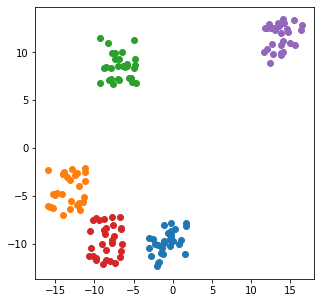

In [5]:
N         = 30 # 30 point per class
n_feature = 2  # x,y  
n_class   = 5
                                          # 틀 생성
X = torch.zeros((0, n_feature))           # Matrix 
Y = torch.zeros((0,), dtype=torch.int32)  # Vector

fig, ax = plt.subplots(figsize=(5,5))
for class_idx in range(n_class):
    center = 30 * (torch.rand(2,) - 0.5 )
    
    x1 = center[0] + 5*(torch.rand(N,1) - 0.5 )
    x2 = center[1] + 5*(torch.rand(N,1) - 0.5 )
    
    x = torch.cat((x1,x2), axis=1)
    y = class_idx*torch.ones((N,1))
    ax.scatter(x1.numpy(), x2.numpy())
    
    X = torch.cat((X,x), axis=0)
    Y = torch.cat((Y,y), axis=0)
    print(X.shape, Y.shape)

### Dataset object

In [21]:
N         = 100 
n_feature = 5     
batch_size= 32

# target Weight & Bias
t_weights = torch.tensor([1,2,3,4,5], dtype = torch.float32) 
t_bias    = torch.tensor([10], dtype = torch.float32) 

X = (torch.rand(N,n_feature) - 0.5)*10
Y = torch.sum(t_weights * X, axis = 1) + t_bias # Broadcasting
print(X.shape, Y.shape)

for batch_idx in range(N//batch_size):
    x = X[batch_idx * batch_size : (batch_idx+1)*batch_size]
    y = Y[batch_idx * batch_size : (batch_idx+1)*batch_size]
    
    print(x.shape, y.shape)

torch.Size([100, 5]) torch.Size([100])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])


In [28]:
from torch.utils.data import DataLoader
# Data loader. Combines a dataset and a sampler, and provides an iterable over the given dataset.
# supports both map-style and iterable-style datasets

train_loader= DataLoader(X, batch_size=32)
label_loader= DataLoader(Y, batch_size=32)

In [29]:
for x in train_loader:
    print(x.shape)

torch.Size([32, 5])
torch.Size([32, 5])
torch.Size([32, 5])
torch.Size([4, 5])


In [30]:
for y in label_loader:
    print(y.shape)

torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([4])


### data size = batch_size * iterations -> 1 epoch (forward & backward)